In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
973,2020-07-13,United Kingdom,289916.0,289603.0,44902.0,44819.0,313.0,83.0
974,2020-07-13,Germany,199258.0,198963.0,9078.0,9064.0,295.0,14.0
975,2020-07-13,Iran,258406.0,257303.0,12771.0,12829.0,1103.0,-58.0
976,2020-07-13,Turkey,212940.0,212993.0,5365.0,5363.0,-53.0,2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2843.6370143149284
RMSE =  6912.416295177274


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  302.5531697341513
RMSE =  699.9964745748209


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  14235.926315789473
RMSE =  18217.710056281412
-- World performances for deaths --
MAE =  1564.9368421052632
RMSE =  1898.9537534902572


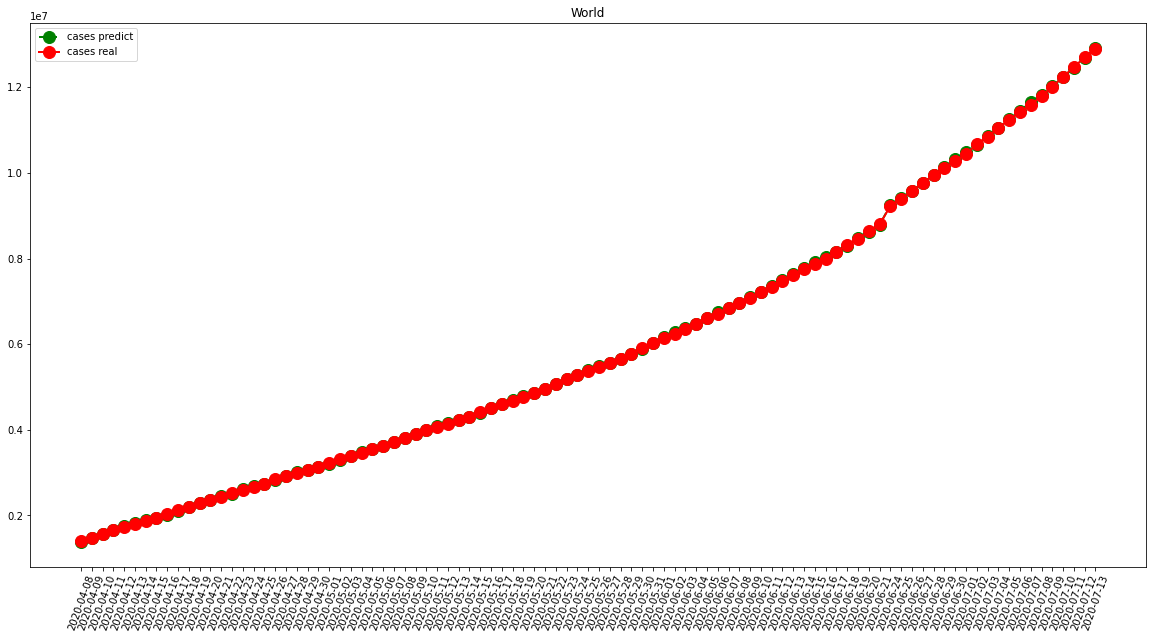

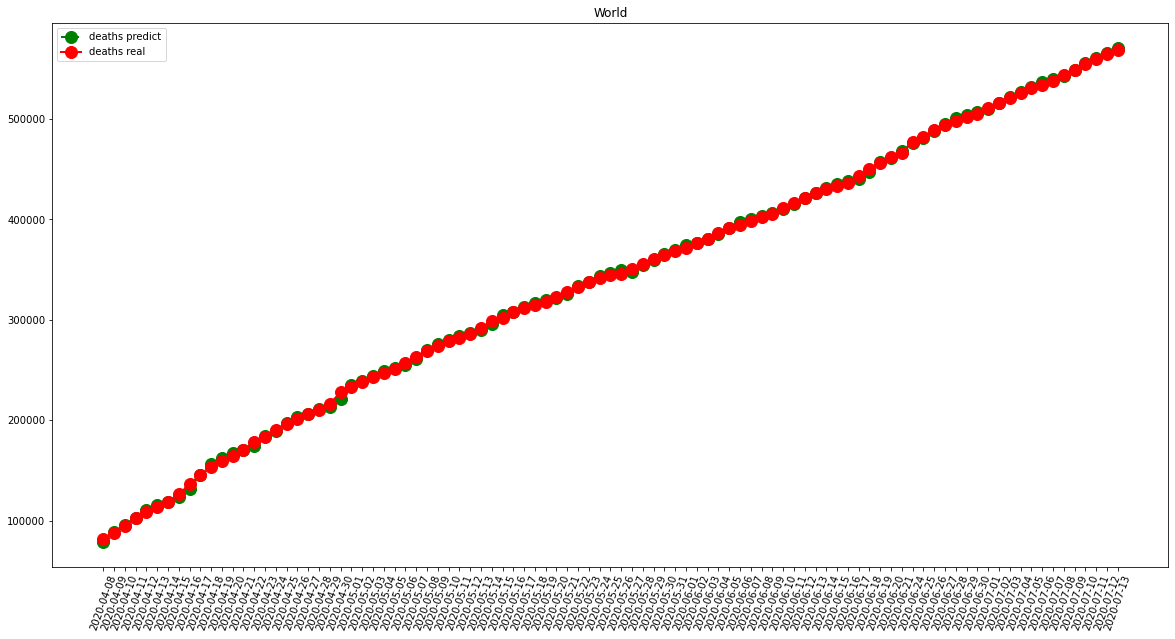

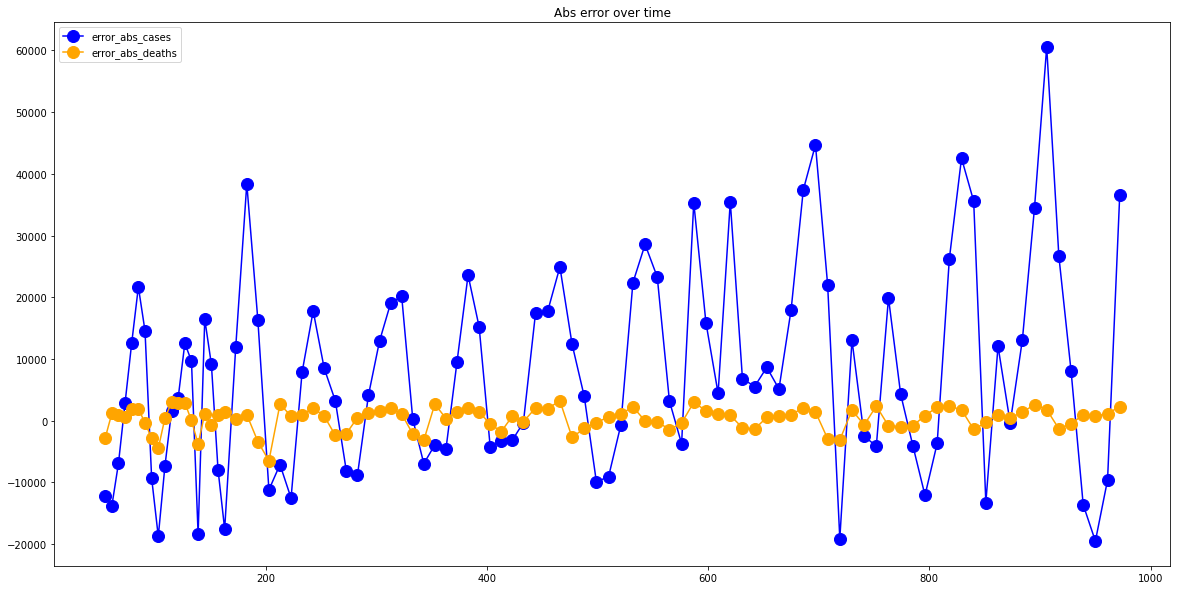

In [7]:
visShow("World")

-- France performances for cases --
MAE =  856.2380952380952
RMSE =  1418.447679347962
-- France performances for deaths --
MAE =  168.68571428571428
RMSE =  326.8934295542116


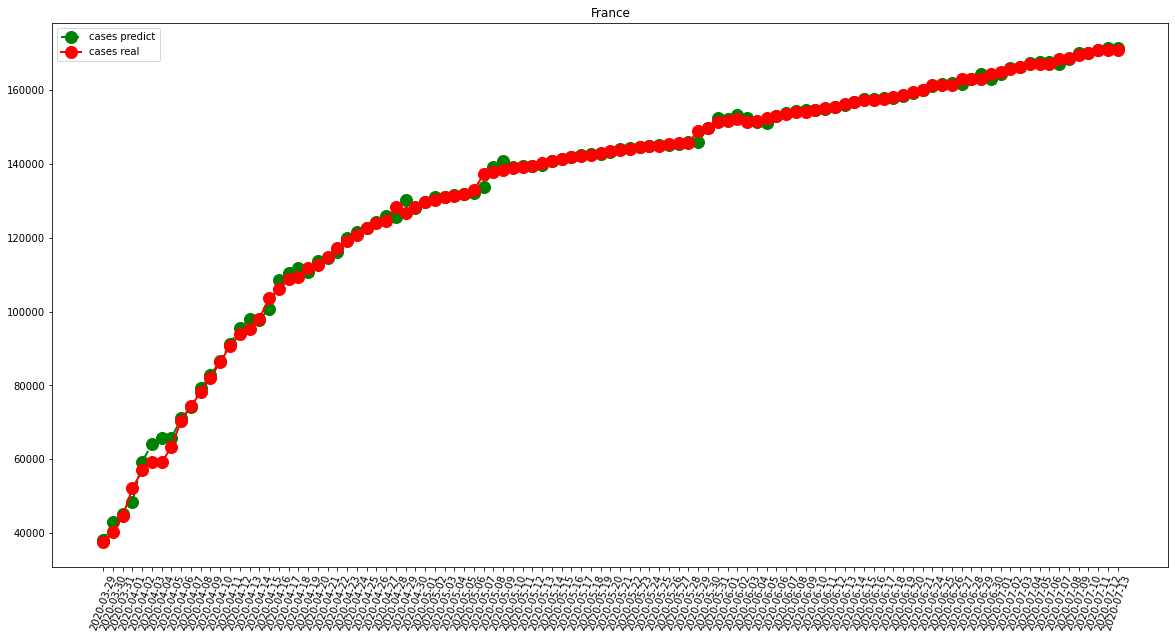

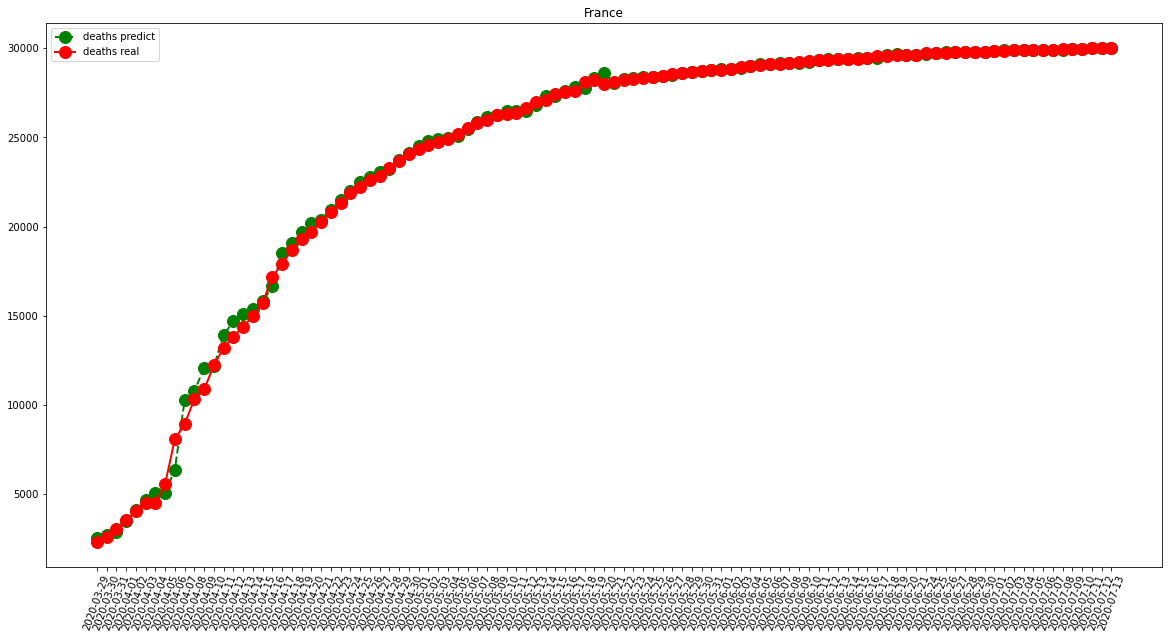

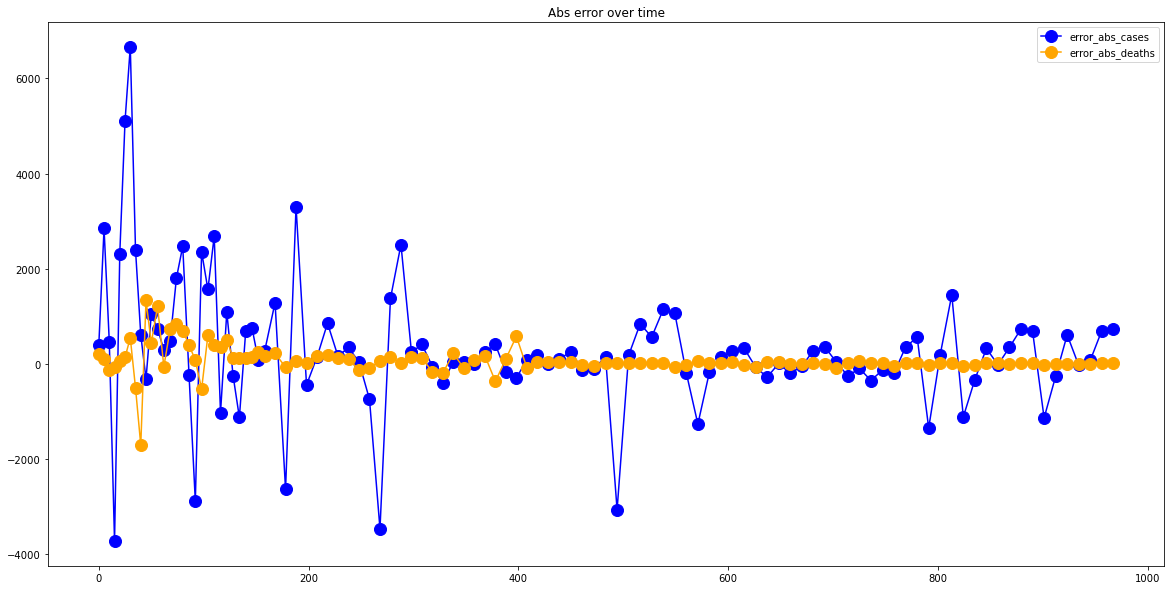

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  360.04761904761904
RMSE =  530.1363077189721
-- Italy performances for deaths --
MAE =  94.13333333333334
RMSE =  288.6714065375734


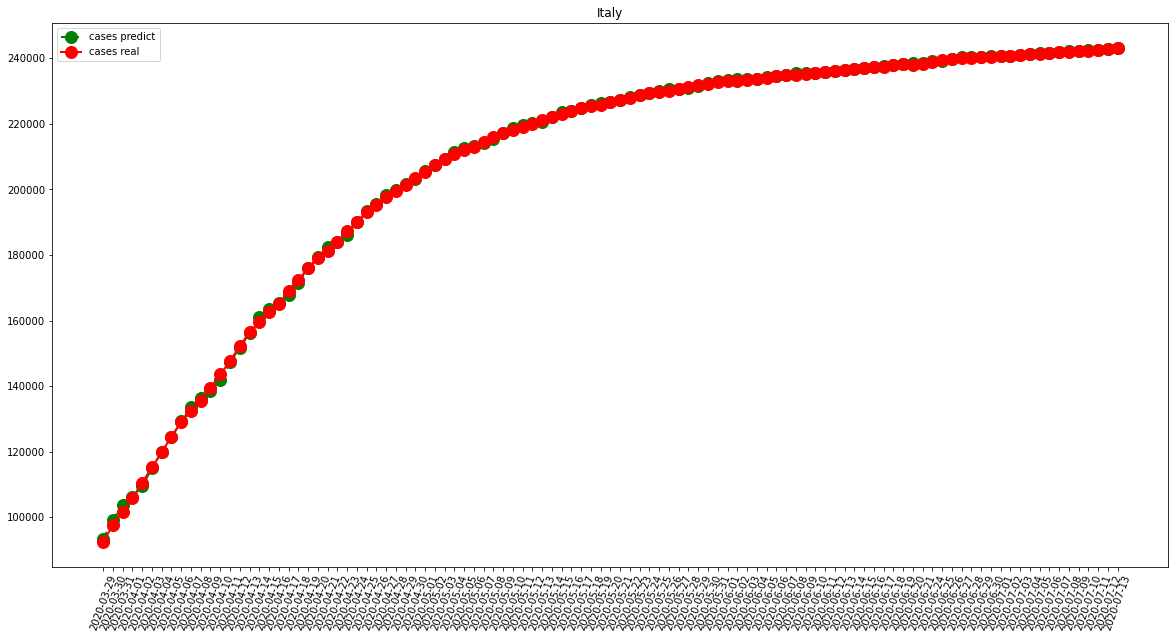

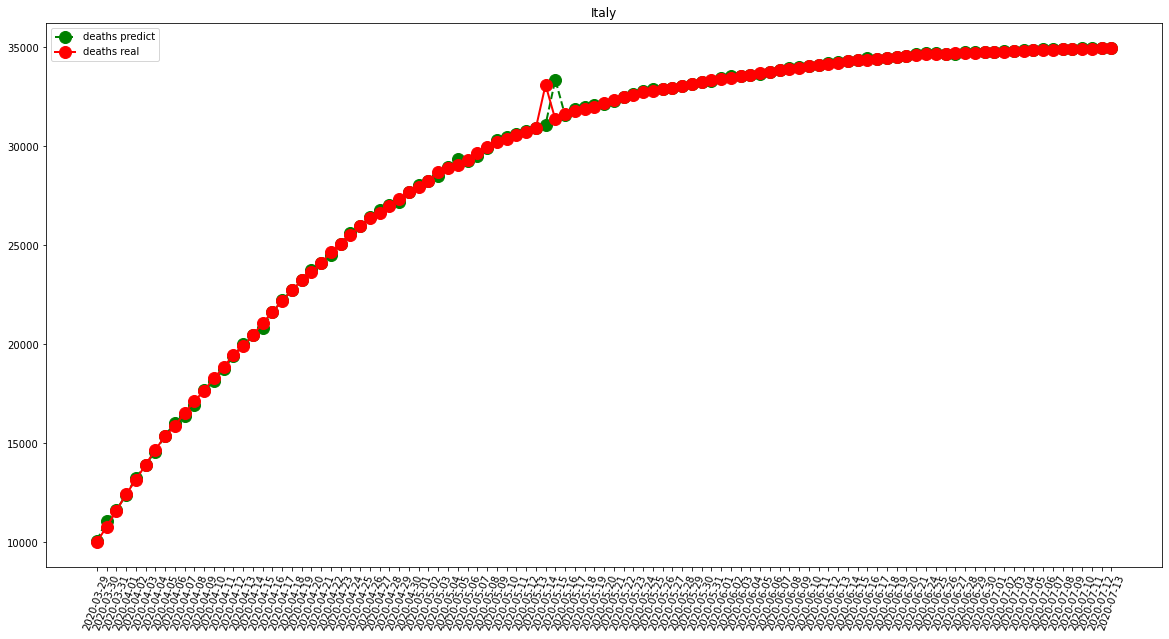

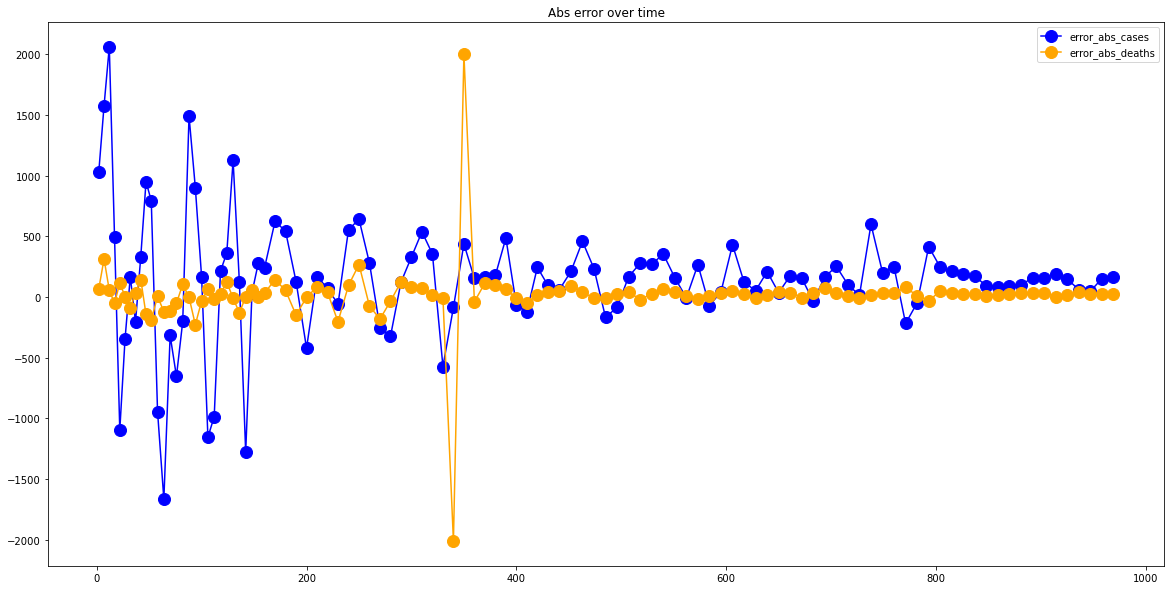

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  838.9333333333333
RMSE =  2003.5700993120113
-- Spain performances for deaths --
MAE =  173.45714285714286
RMSE =  396.1140889044108


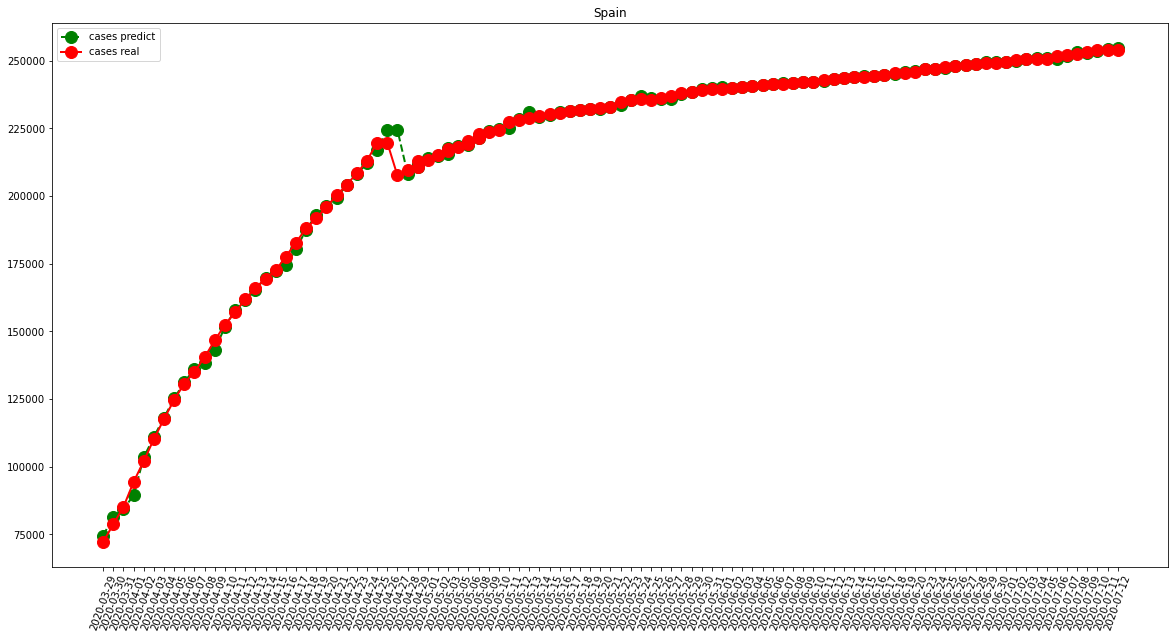

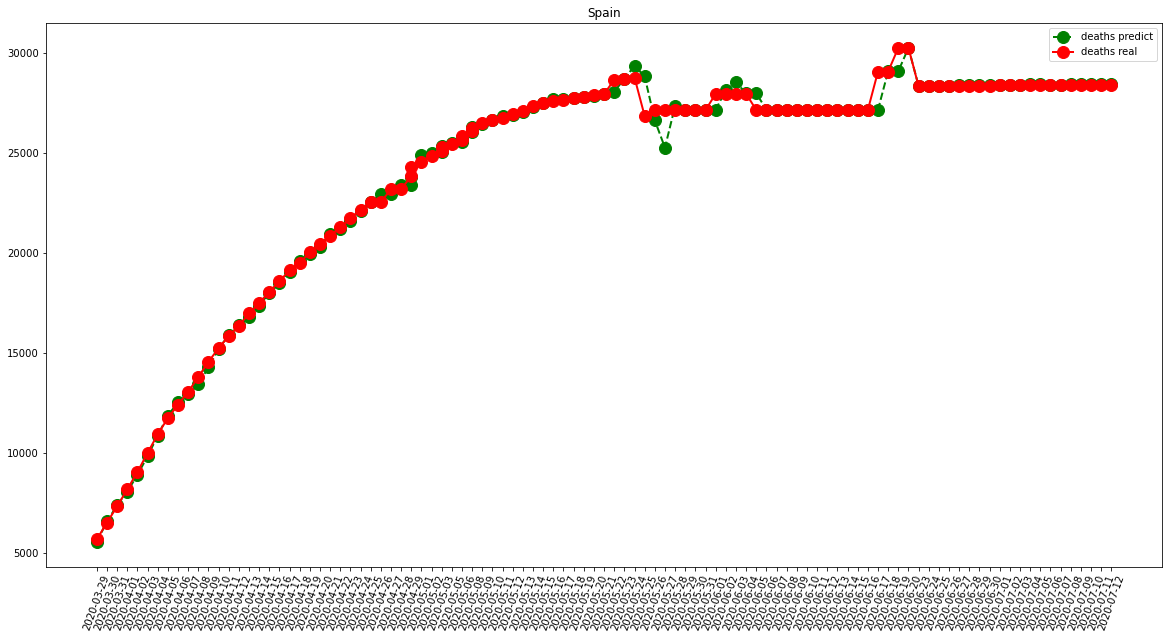

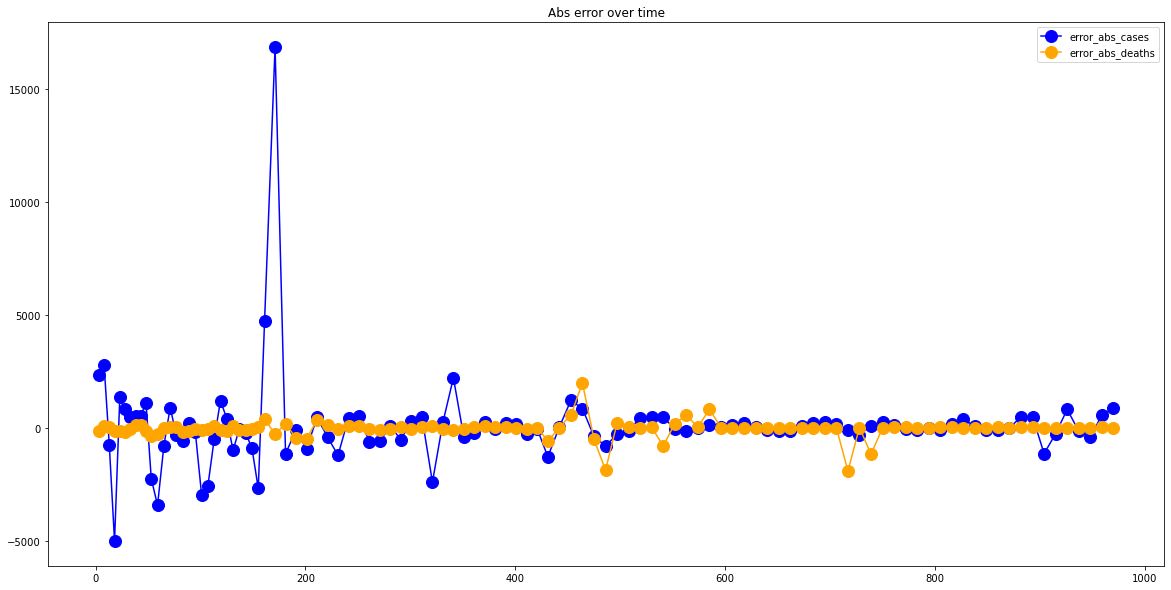

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5183.390476190476
RMSE =  7037.788467571735
-- United States performances for deaths --
MAE =  526.7523809523809
RMSE =  766.7661653861314


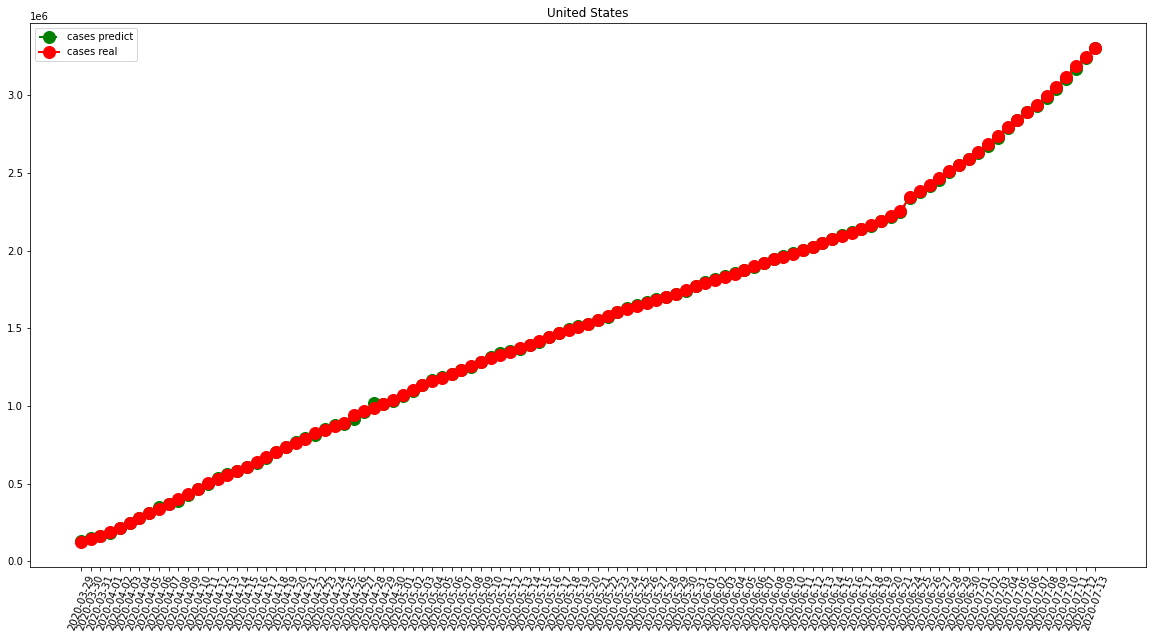

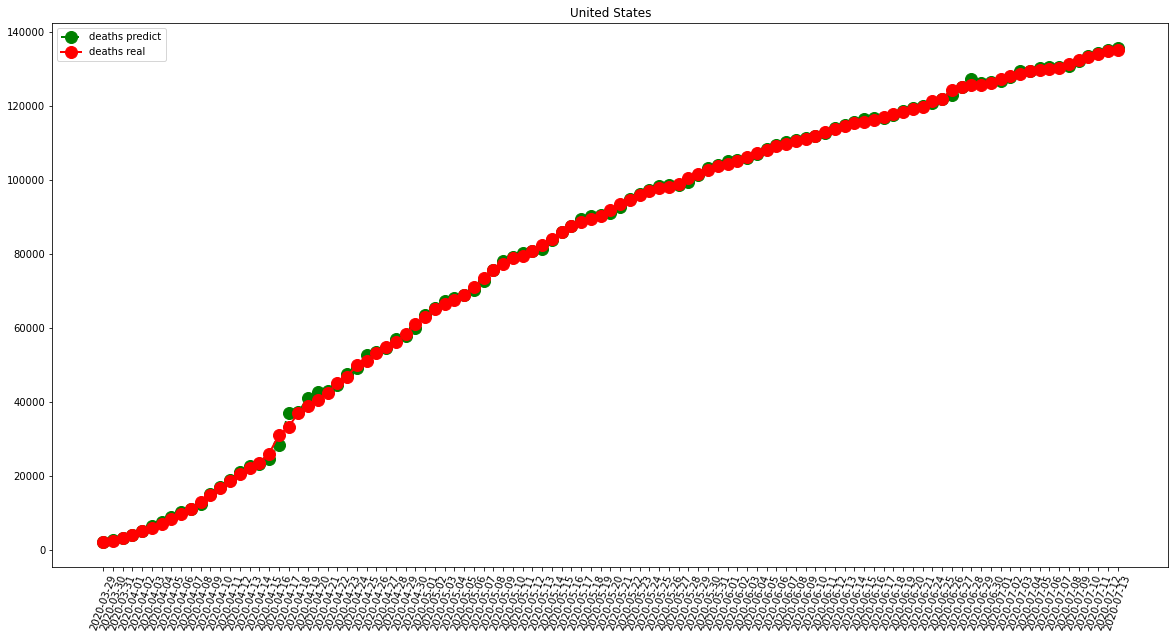

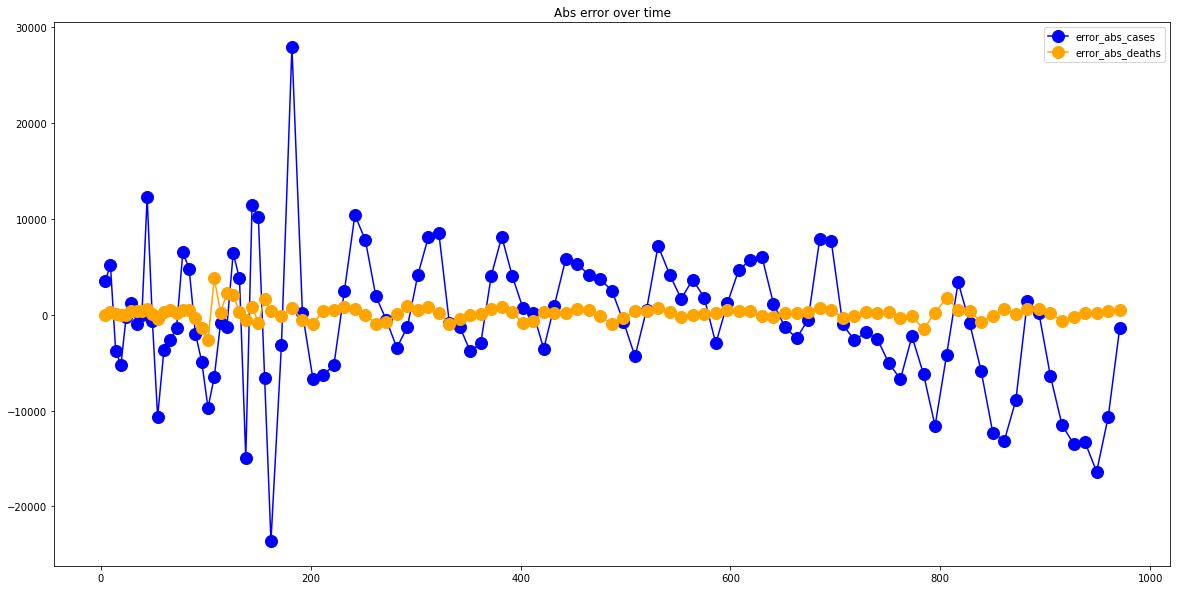

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  85.98095238095237
RMSE =  115.1328838880576
-- China performances for deaths --
MAE =  37.02857142857143
RMSE =  153.1813118030861


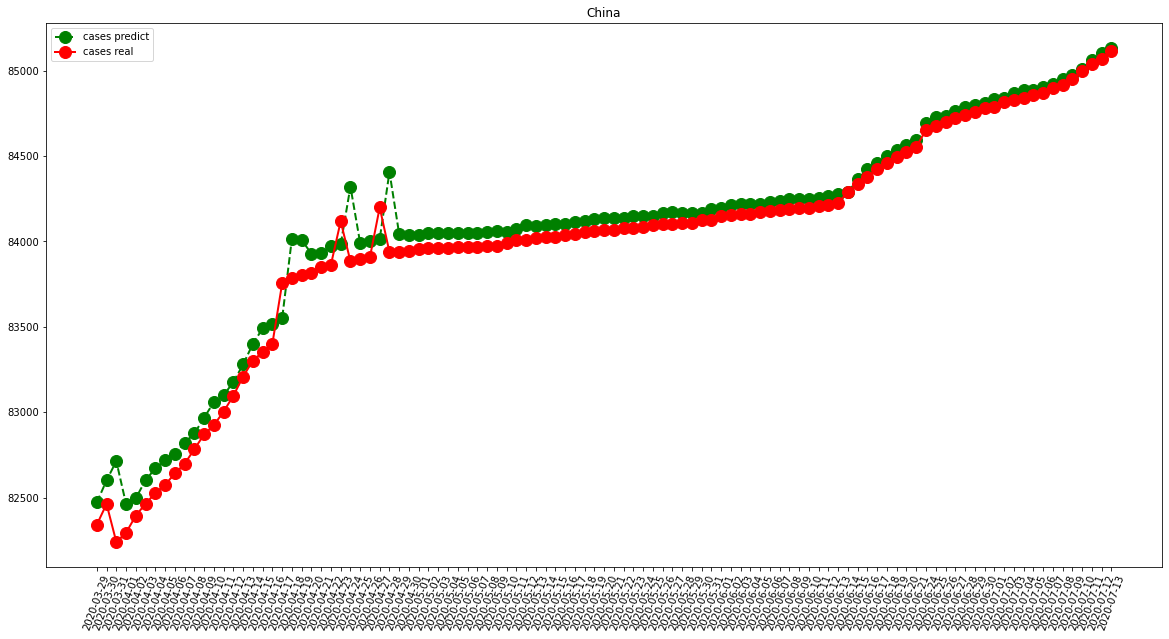

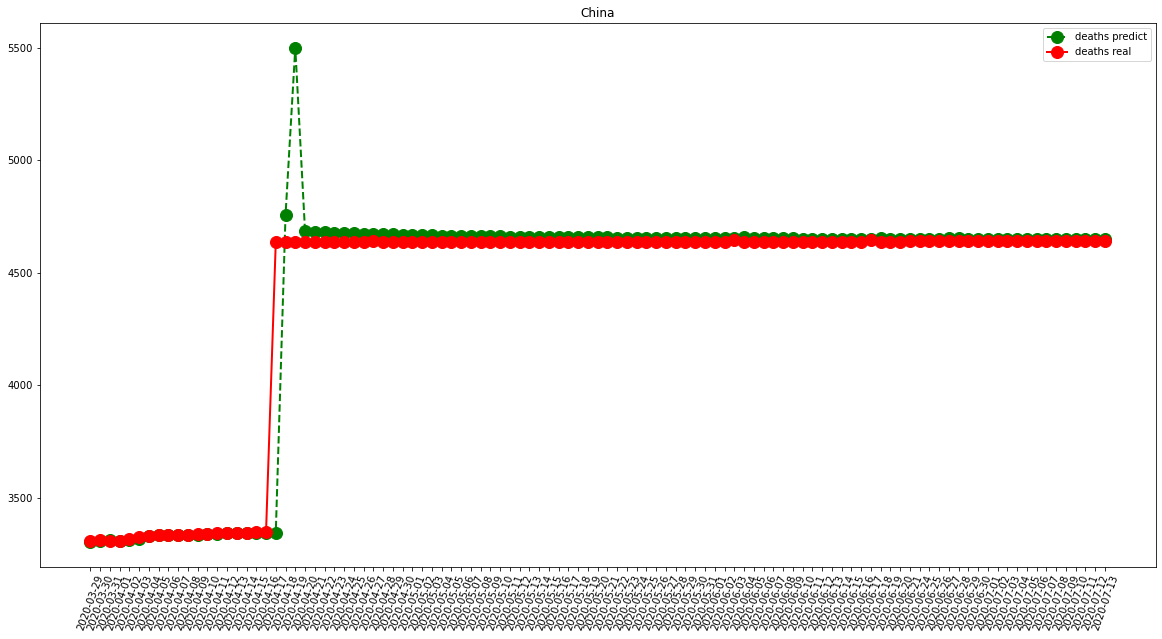

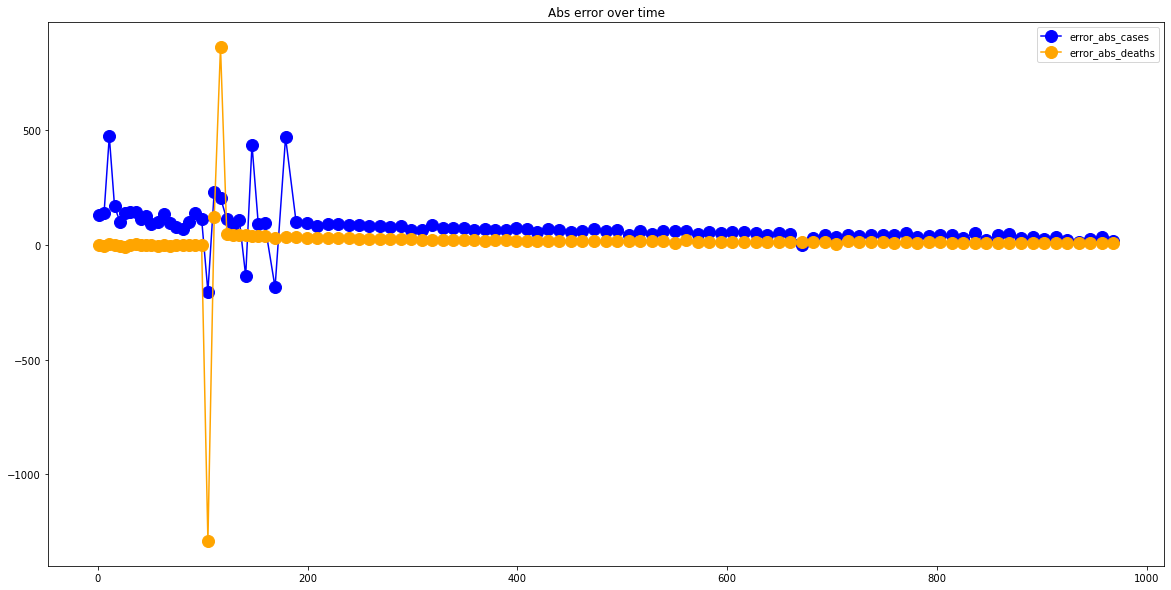

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1512.4545454545455
RMSE =  4752.827411404437
-- United Kingdom performances for deaths --
MAE =  232.6883116883117
RMSE =  557.7795845448853


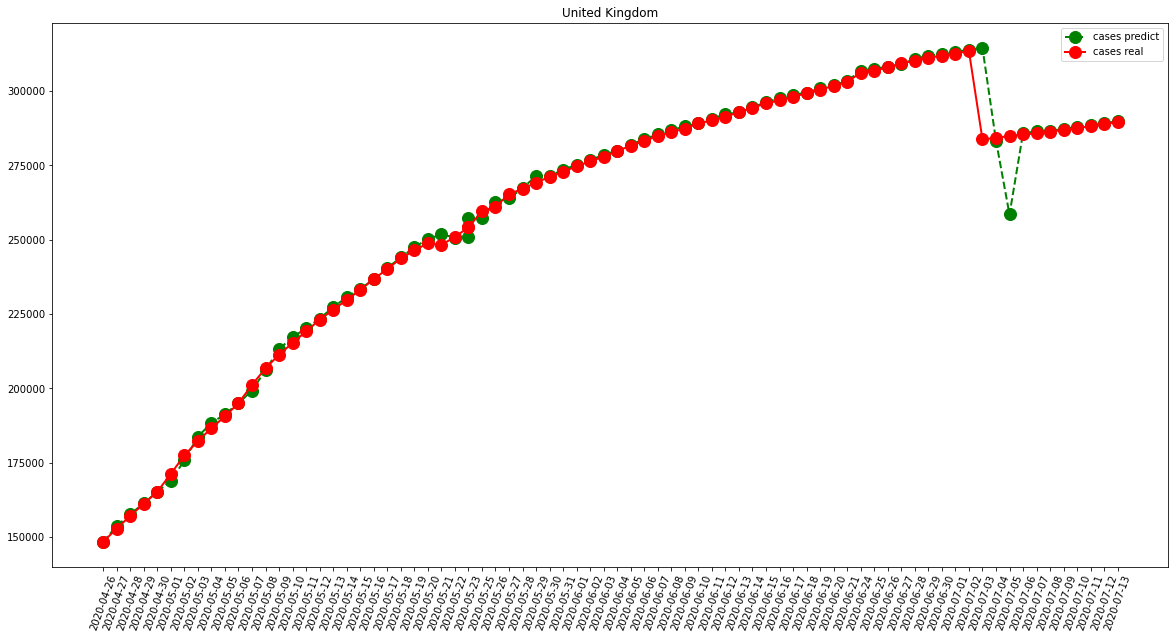

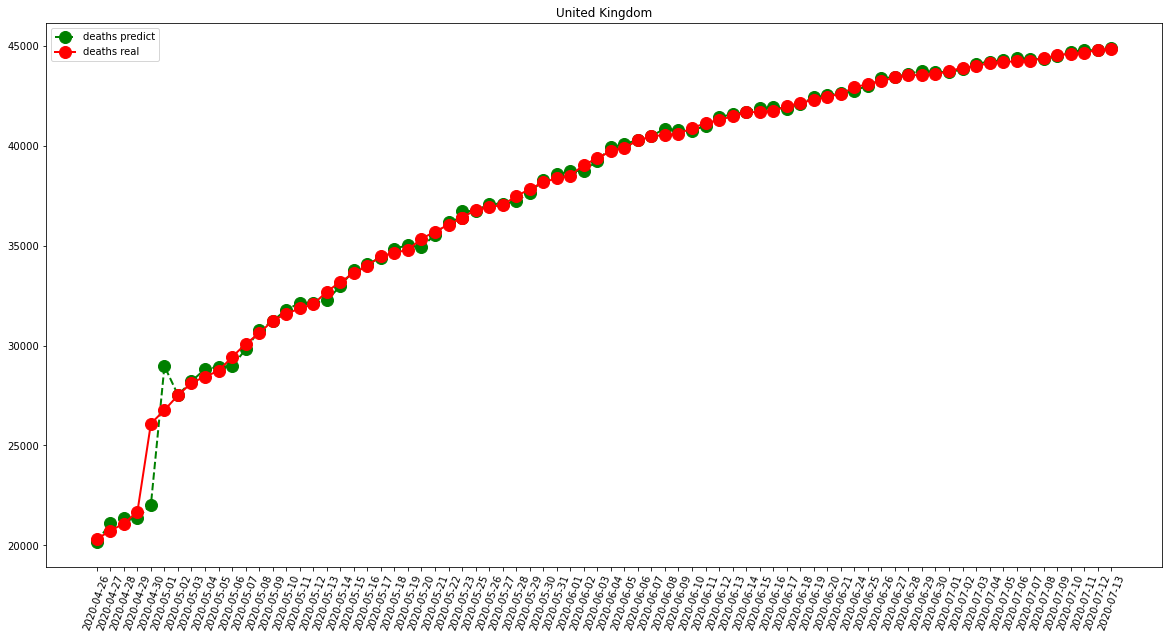

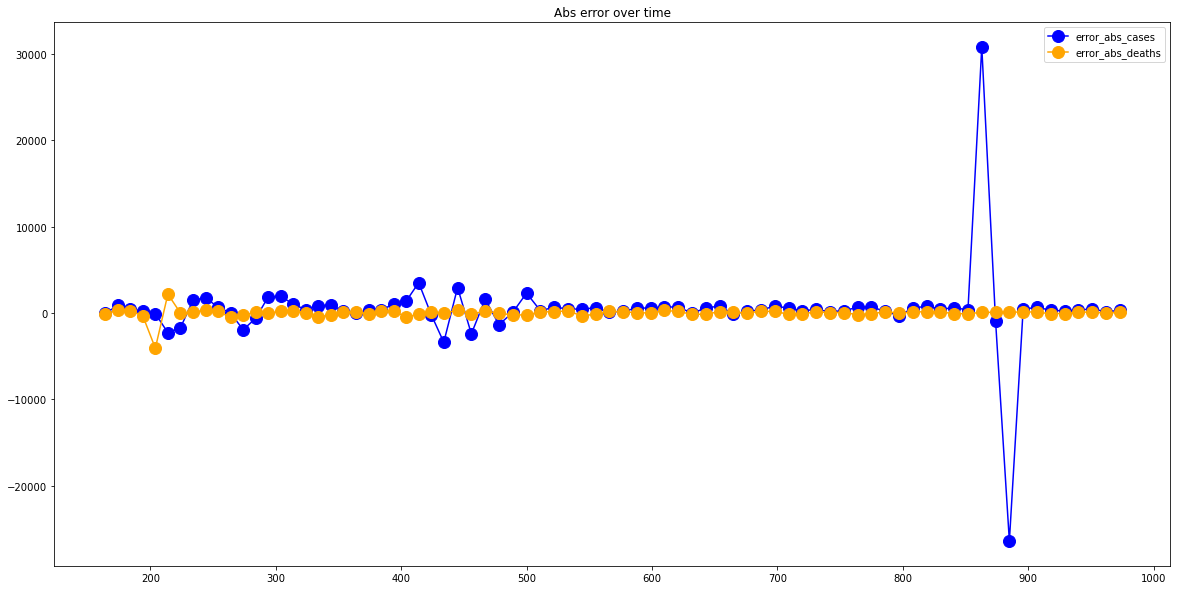

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  297.0779220779221
RMSE =  424.364413970064
-- Germany performances for deaths --
MAE =  29.662337662337663
RMSE =  49.63974109626174


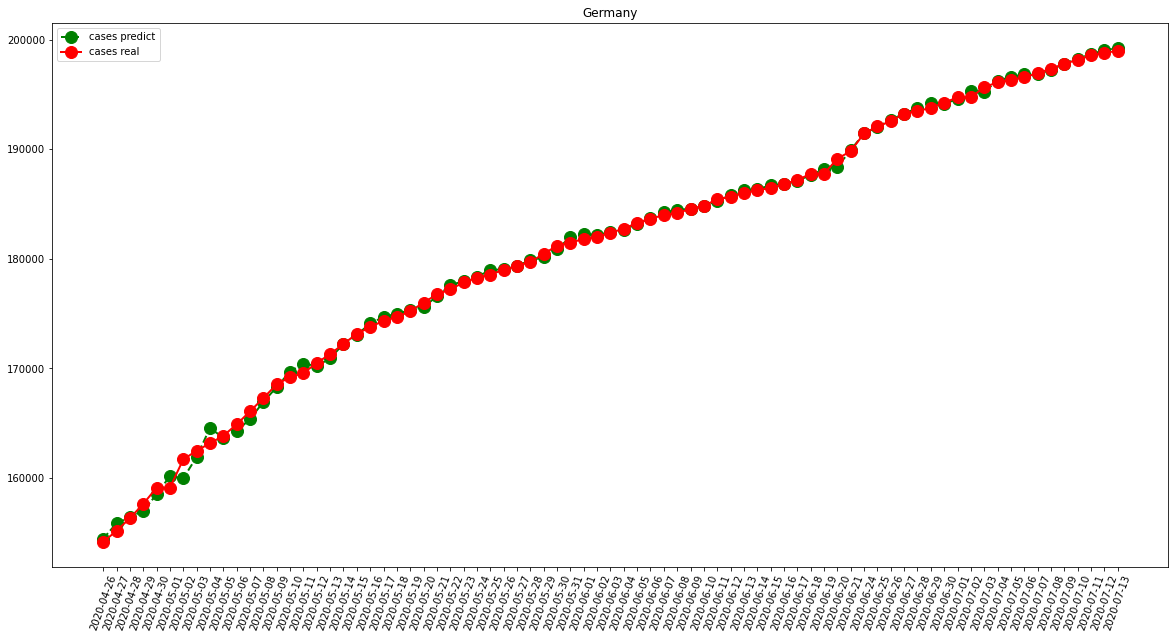

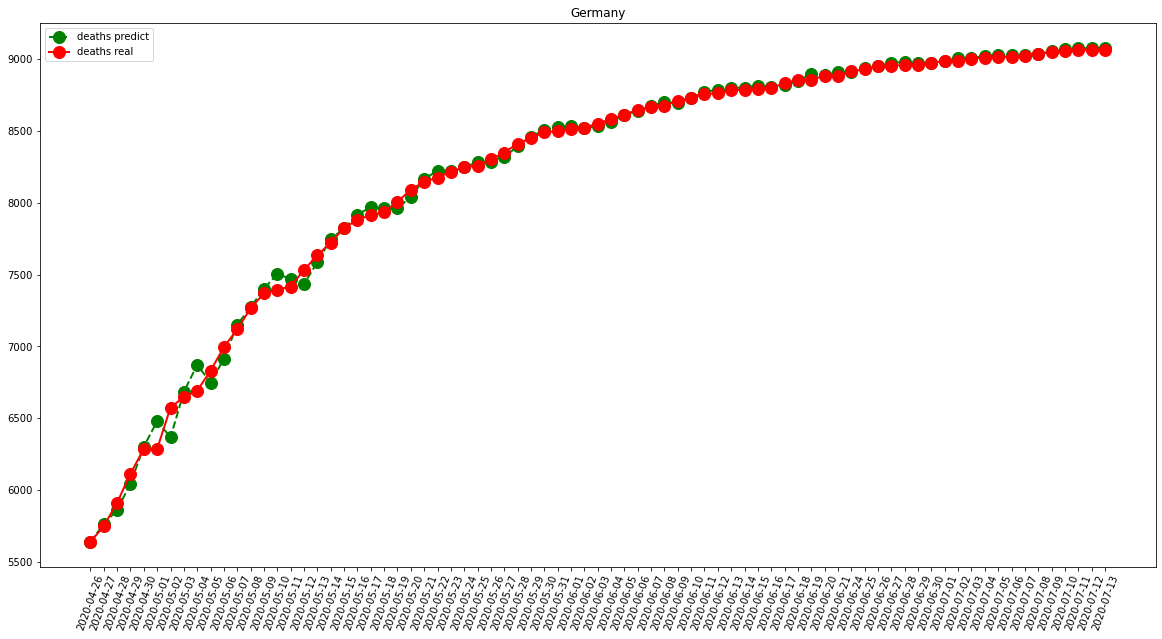

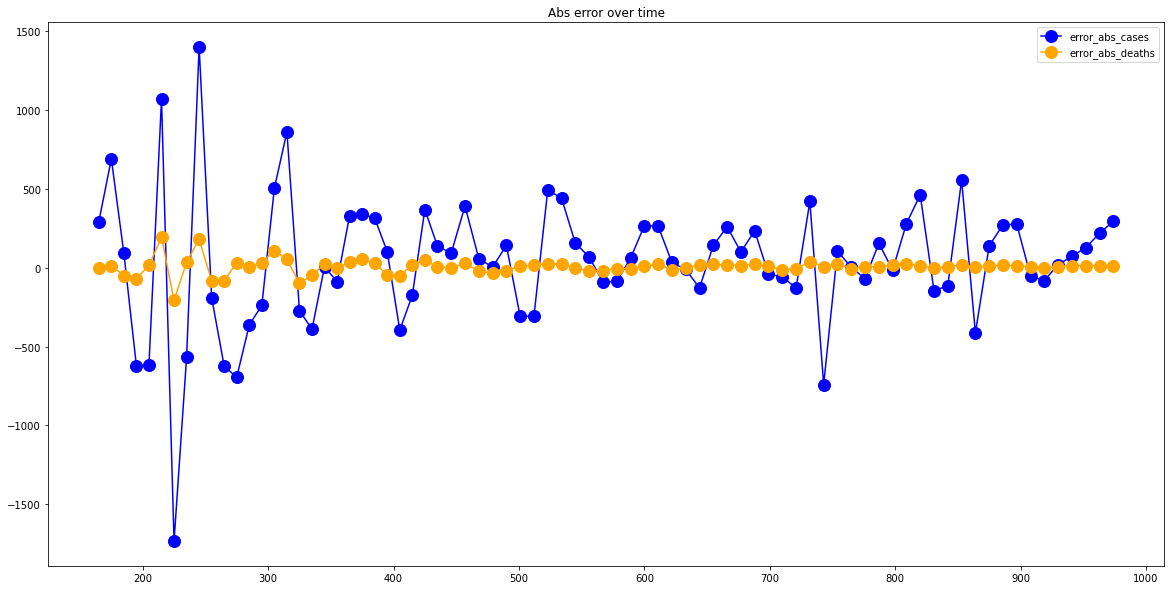

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  343.012987012987
RMSE =  446.49637511072024
-- Iran performances for deaths --
MAE =  18.77922077922078
RMSE =  29.843748937580724


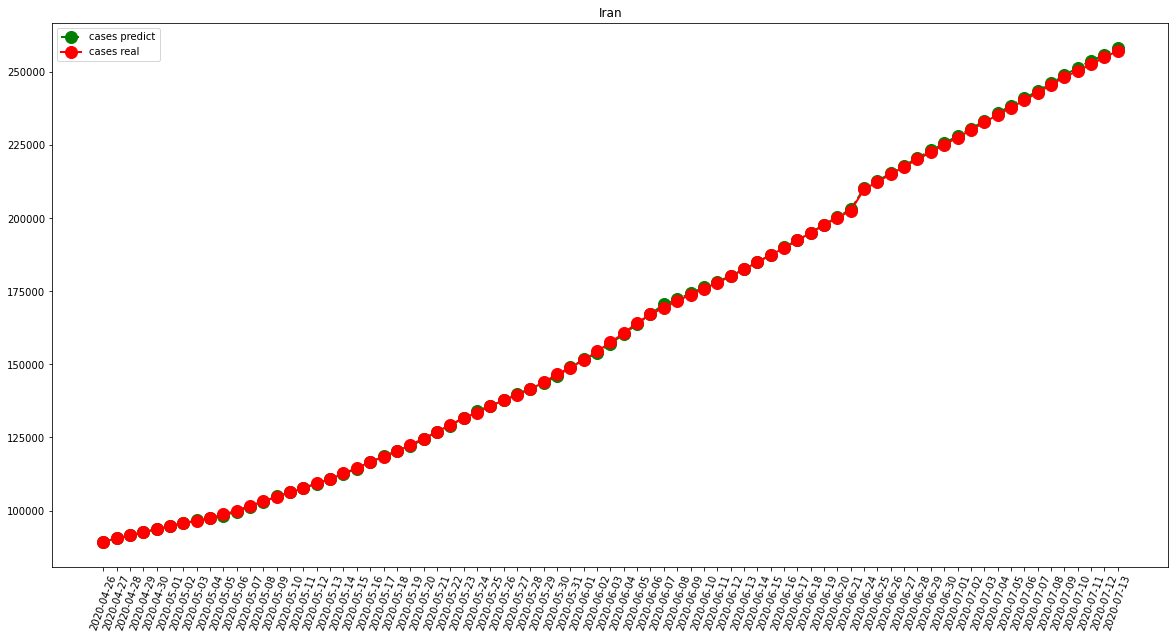

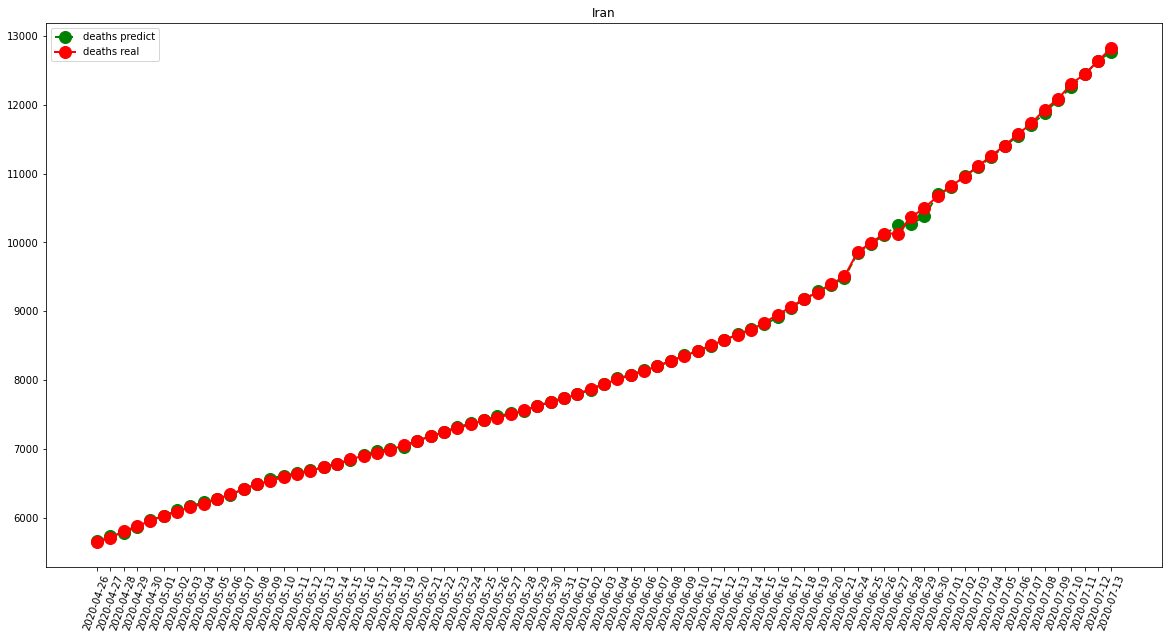

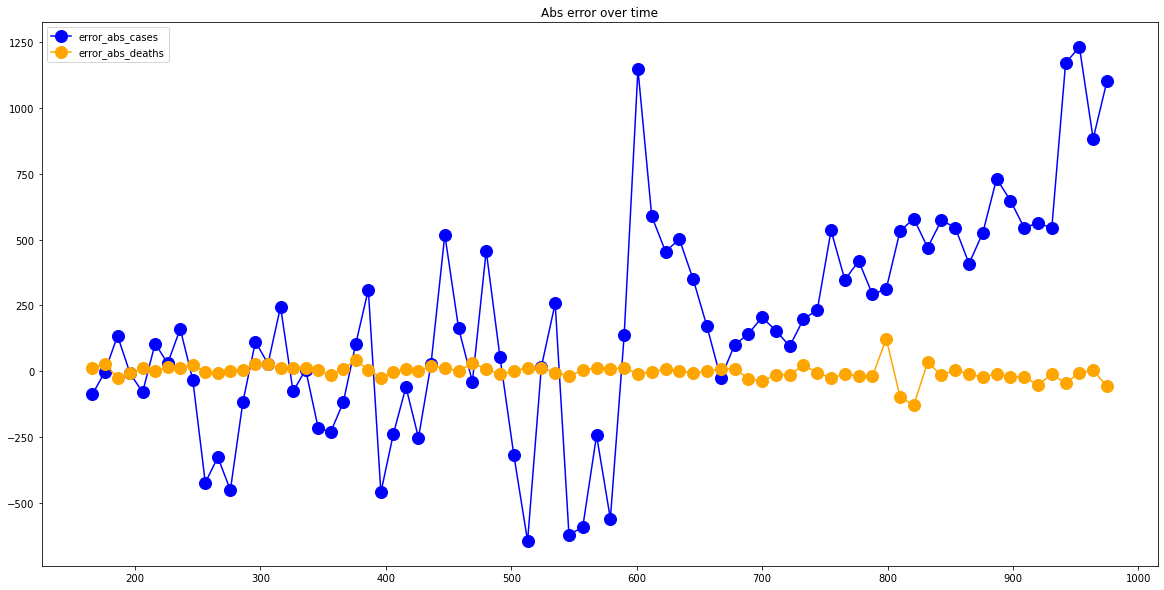

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  243.94805194805195
RMSE =  391.3826970937979
-- Turkey performances for deaths --
MAE =  24.07792207792208
RMSE =  115.67621628056051


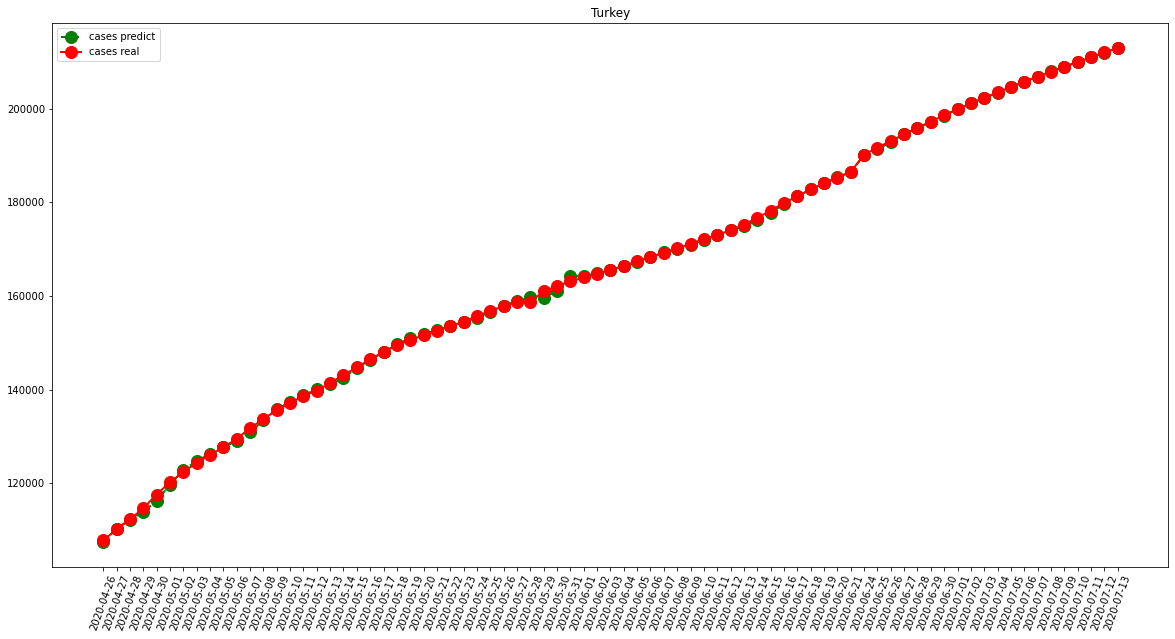

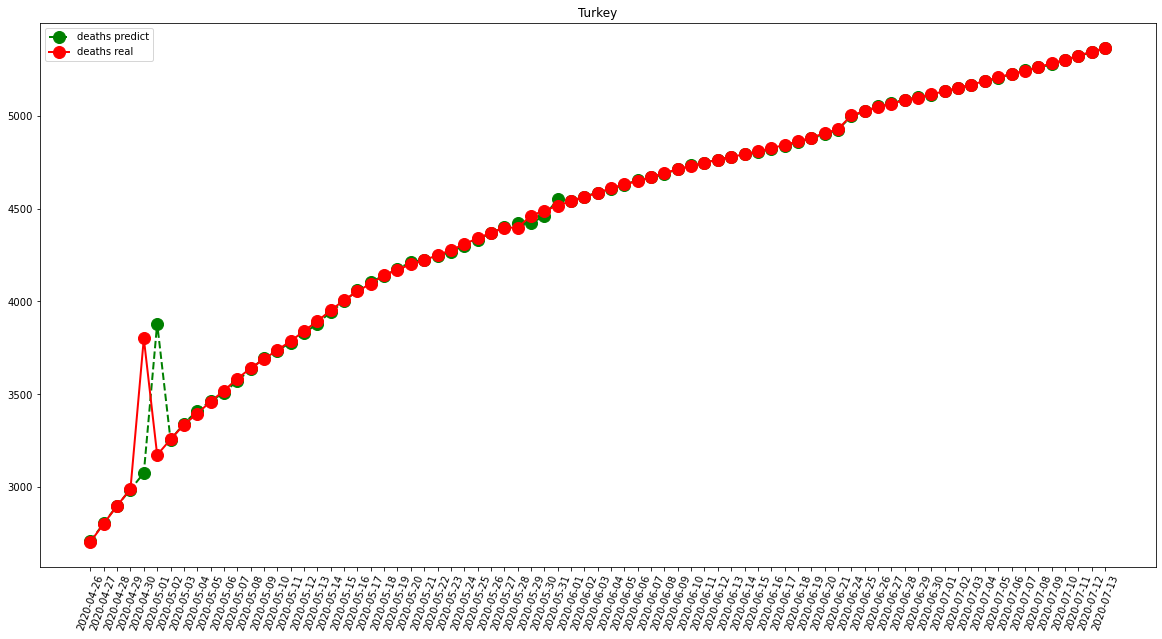

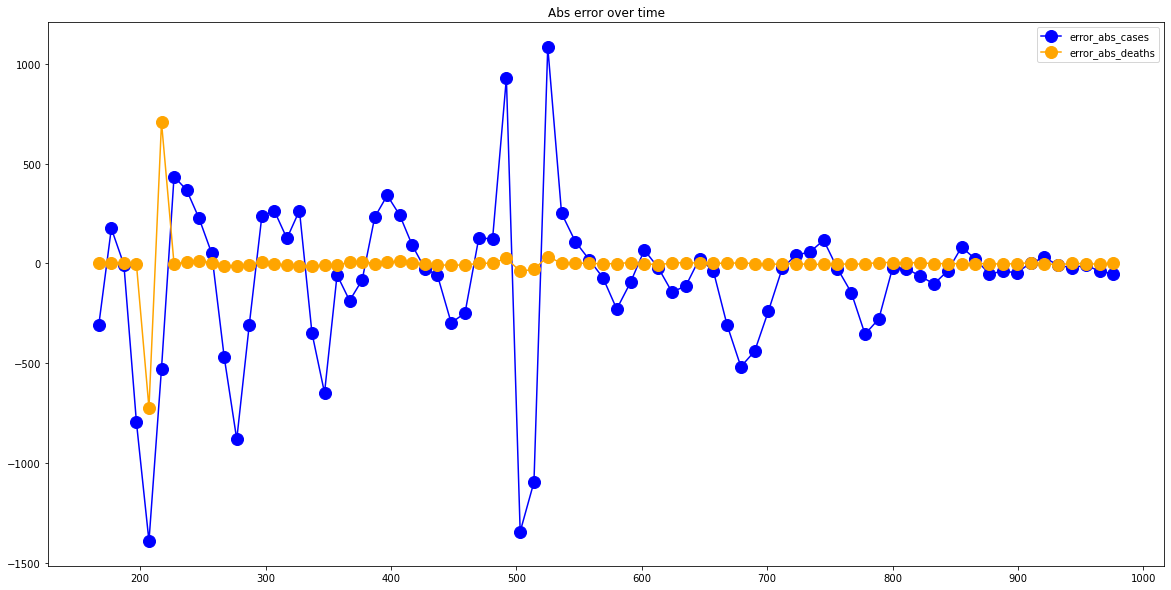

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9501.04
RMSE =  12293.478599647864
-- Brazil performances for deaths --
MAE =  374.42
RMSE =  463.81869302562615


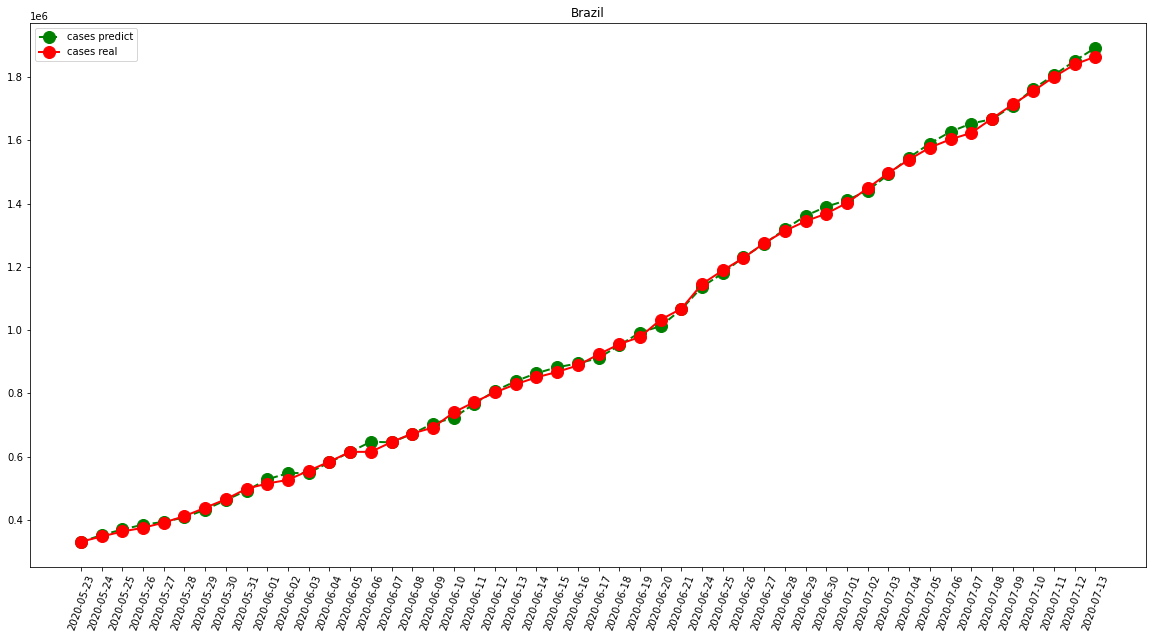

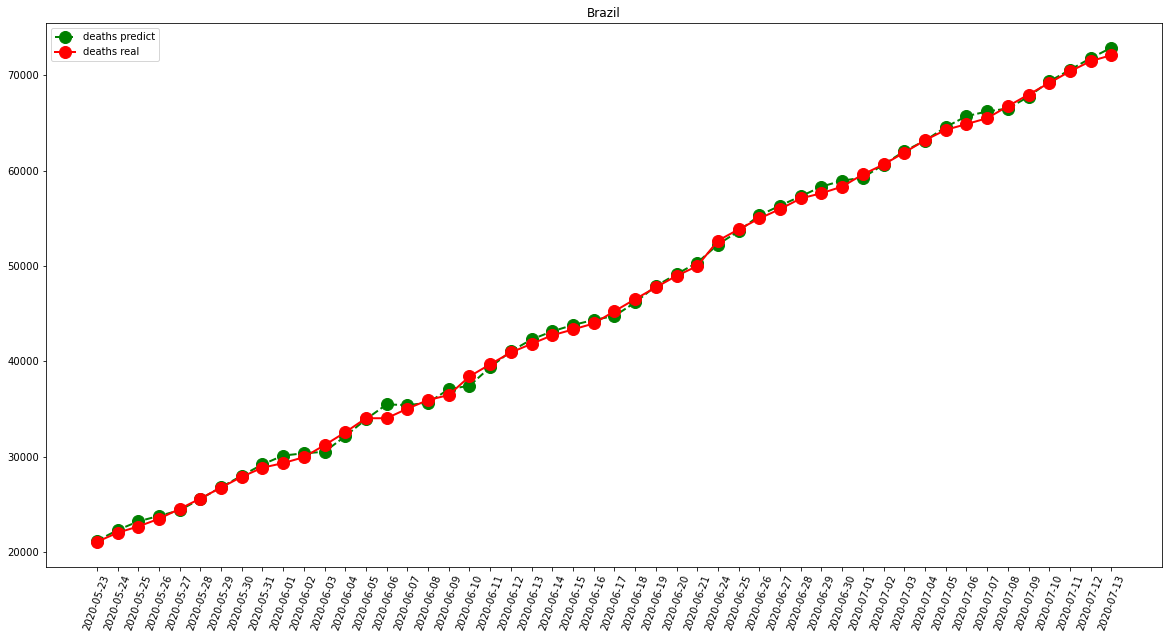

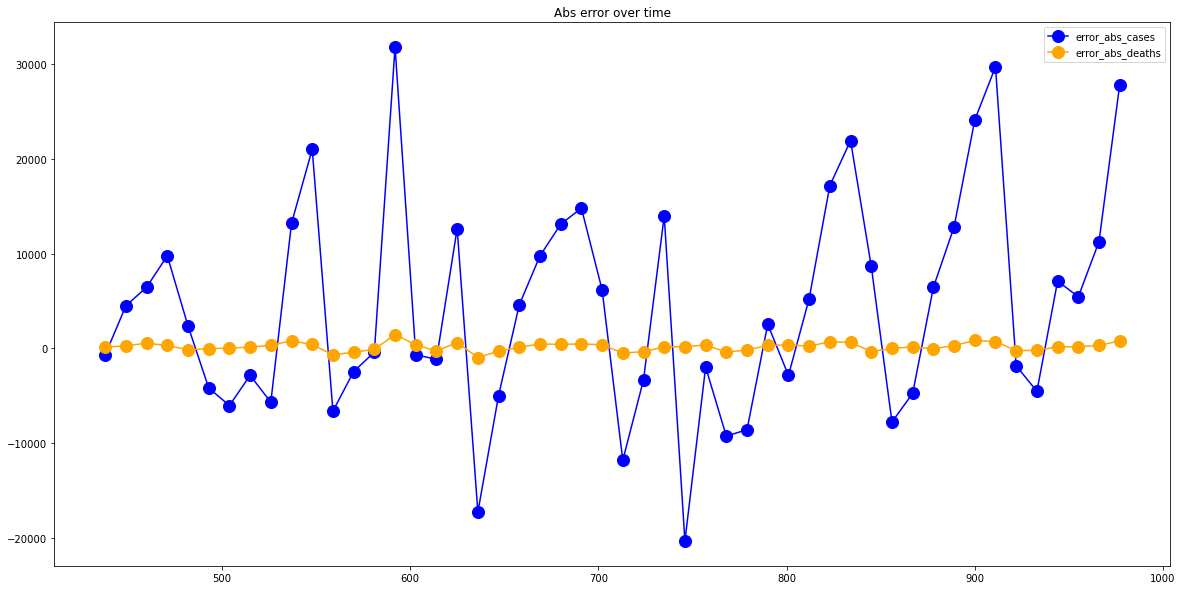

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)